In [5]:
import networkx as nx

# Đọc file danh sách cạnh
G = nx.read_edgelist("D:/du lieu o cu/HUTECH Courses/Social Networking Course/DataLab/congress_network/congress_network/congress - Copy.edgelist", create_using=nx.DiGraph(), nodetype=int)

print(f"Số nút: {G.number_of_nodes()}")
print(f"Số cạnh: {G.number_of_edges()}")


Số nút: 384
Số cạnh: 1654


In [6]:
!pip install python-louvain


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from networkx.algorithms import community
from community import community_louvain  # Louvain method
from collections import defaultdict
import numpy as np

# Định nghĩa lớp CommunityDetection
class CommunityDetection:
    def __init__(self, graph):
        self.graph = graph
        self.partitions = {}
        self.metrics = pd.DataFrame()

    def detect_girvan_newman(self):
        generator = community.girvan_newman(self.graph)
        best_partition = max(generator, key=lambda partition: community.modularity(self.graph, partition))
        self.partitions['Girvan-Newman'] = list(best_partition)

    def detect_label_propagation(self):
        partition = list(community.label_propagation_communities(self.graph))
        self.partitions['Label Propagation'] = partition


    def detect_louvain(self):
        partition_dict = community_louvain.best_partition(self.graph)  # Trả về dictionary
        communities = defaultdict(list)

        # Nhóm các nút theo chỉ số cụm  
        for node, group in partition_dict.items():
            communities[group].append(node)
        
        self.partitions['Louvain'] = list(communities.values())


    def calculate_metrics(self):
        metrics_data = []
        for name, communities in self.partitions.items():
            metrics_data.append({
                'Algorithm': name,
                'Num Communities': len(communities),
                'Modularity': community.modularity(self.graph, communities)
            })
        self.metrics = pd.DataFrame(metrics_data)

    def create_community_node_colors(self, communities):
        node_colors = []
        for node in self.graph:
            for idx, comm in enumerate(communities):
                if node in comm:
                    node_colors.append(plt.cm.jet(idx / len(communities)))
                    break
        return node_colors

    def visualize_communities(self):
        fig, axes = plt.subplots(1, len(self.partitions), figsize=(20, 6))
        for ax, (name, communities) in zip(axes, self.partitions.items()):
            node_colors = self.create_community_node_colors(communities)
            pos = nx.spring_layout(self.graph, k=0.3, iterations=50, seed=2)
            modularity_score = community.modularity(self.graph, communities)
            ax.set_title(f"{name}\n{len(communities)} communities (Modularity: {modularity_score:.3f})")
            nx.draw(self.graph, pos=pos, node_size=500, node_color=node_colors,
                    with_labels=True, font_size=10, ax=ax)
        plt.tight_layout()
        plt.show()

    def plot_metrics(self):
        if self.metrics.empty:
            print("Metrics have not been calculated yet.")
            return

        fig, axes = plt.subplots(1, 2, figsize=(18, 7))

        # Bar chart for comparing 'Num Communities'
        axes[0].bar(self.metrics['Algorithm'], self.metrics['Num Communities'], color="#8E44AD")
        axes[0].set_title("Num Communities Comparison")
        axes[0].set_xlabel("Algorithm")
        axes[0].set_ylabel("Num Communities")

        # Bar chart for comparing Modularity
        axes[1].bar(self.metrics['Algorithm'], self.metrics['Modularity'], color="#F2D140")
        axes[1].set_title("Modularity Comparison")
        axes[1].set_xlabel("Algorithm")
        axes[1].set_ylabel("Modularity")

        plt.tight_layout()
        plt.show()


Kết quả các chỉ số đo lường cộng đồng:
           Algorithm  Num Communities  Modularity
0      Girvan-Newman              190    0.228817
1  Label Propagation                1    0.000000
2            Louvain               10    0.506154


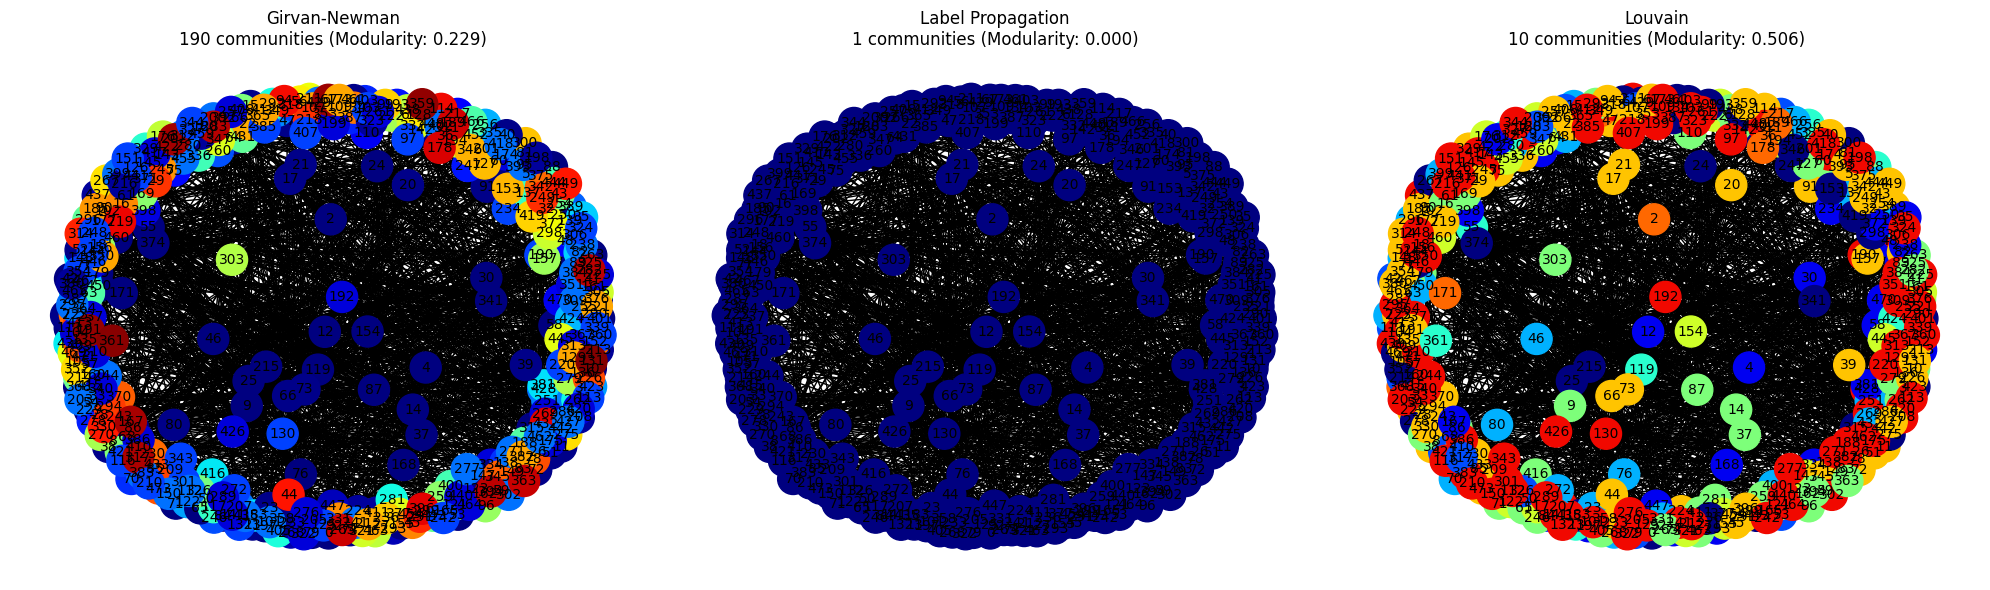

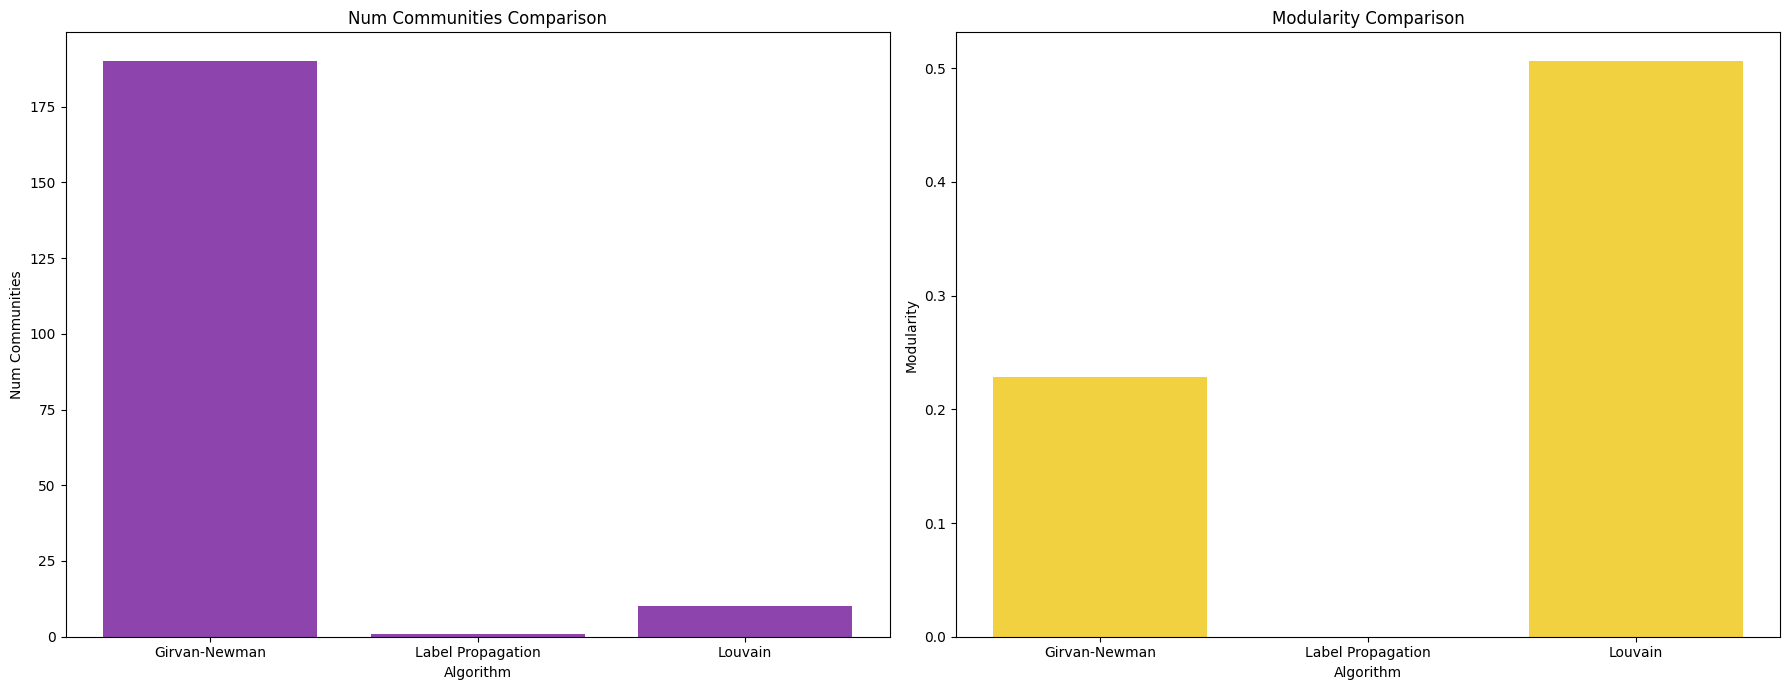

In [8]:
# Đọc file edgelist
file_path = "D:/du lieu o cu/HUTECH Courses/Social Networking Course/DataLab/congress_network/congress_network/congress - Copy.edgelist"  # Thay đổi đường dẫn tùy theo tệp của bạn
G = nx.read_edgelist(file_path, create_using=nx.Graph(), nodetype=int)

# Khởi tạo và chạy CommunityDetection
cd = CommunityDetection(G)
cd.detect_girvan_newman()
cd.detect_label_propagation()
cd.detect_louvain()
cd.calculate_metrics()

# Hiển thị kết quả
print("Kết quả các chỉ số đo lường cộng đồng:")
print(cd.metrics)

cd.visualize_communities()
cd.plot_metrics()